# Introduction to Scikit-Learn (sklearn)
This notebook demonstrate some of the most useful function of the beautiful Scikit-Learn library.
plan:

0. An end-to-end Scikit-Learn workflow
1. Getting the data ready
2. Choose the right estimator/algorithm for our problems
3. Fit the model/algorithm and use it to make predictions on our data
4. Evaluating a model
5. Improve a model
6. Save and load a trained model
7. Putting it all together!

## 0. An end-to-end Scikit-Learn workflow

In [67]:
# Let's listify the contents
what_were_covering = [
    "0. An end-to-end Scikit-Learn workflow",
    "1. Getting the data ready",
    "2. Choose the right estimator/algorithm for our problems",
    "3. Fit the model/algorithm and use it to make predictions on our data",
    "4. Evaluating a model",
    "5. Improve a model",
    "6. Save and load a trained model",
    "7. Putting it all together!"]

In [68]:
what_were_covering

['0. An end-to-end Scikit-Learn workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator/algorithm for our problems',
 '3. Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a trained model',
 '7. Putting it all together!']

In [69]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 1. Get the data ready
import pandas as pd
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [8]:
# Create X (features matrix)
X = heart_disease.drop("target", axis=1)

# Create y (labels)
y = heart_disease["target"]

In [52]:
# 2. Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators= 94)

# We'll keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 94,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [53]:
# Fit the model to the training data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 80% data for training and 20% data for testing

In [54]:
clf.fit(X_train, y_train) # clf is the RandomForest Classifier

RandomForestClassifier(n_estimators=94)

In [19]:
# make a prediction
y_label = clf.predict(np.array([0,2,3,4]))

C:\Users\UNIEURO\Desktop\sample_project\env\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[0. 2. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [40]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
70,54,1,2,120,258,0,0,147,0,0.4,1,0,3
177,64,1,2,140,335,0,1,158,0,0.0,2,0,2
284,61,1,0,140,207,0,0,138,1,1.9,2,1,3
29,53,1,2,130,197,1,0,152,0,1.2,0,0,2
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50,51,0,2,130,256,0,0,149,0,0.5,2,0,2
229,64,1,2,125,309,0,1,131,1,1.8,1,0,3
37,54,1,2,150,232,0,0,165,0,1.6,2,0,3
157,35,1,1,122,192,0,1,174,0,0.0,2,0,2


In [41]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
186,60,1,0,130,253,0,1,144,1,1.4,2,1,3
101,59,1,3,178,270,0,0,145,0,4.2,0,0,3
131,49,0,1,134,271,0,1,162,0,0.0,1,0,2
129,74,0,1,120,269,0,0,121,1,0.2,2,1,2
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,62,1,0,120,267,0,1,99,1,1.8,1,2,3
242,64,1,0,145,212,0,0,132,0,2.0,1,2,1
24,40,1,3,140,199,0,1,178,1,1.4,2,0,3
275,52,1,0,125,212,0,1,168,0,1.0,2,2,3


In [55]:
y_preds = clf.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1], dtype=int64)

In [43]:
y_test

186    0
101    1
131    1
129    1
106    1
      ..
198    0
242    0
24     1
275    0
235    0
Name: target, Length: 61, dtype: int64

In [56]:
# 4. Evaluate the model on the training data and test data
clf.score(X_train, y_train)

1.0

In [58]:
clf.score(X_test,y_test)

0.8524590163934426

In [59]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.86      0.75      0.80        24
           1       0.85      0.92      0.88        37

    accuracy                           0.85        61
   macro avg       0.85      0.83      0.84        61
weighted avg       0.85      0.85      0.85        61



In [60]:
confusion_matrix(y_test, y_preds)

array([[18,  6],
       [ 3, 34]], dtype=int64)

In [61]:
accuracy_score(y_test, y_preds)

0.8524590163934426

In [62]:
precision_score(y_test, y_preds)

0.85

In [63]:
# 5. Improve a model
# Try different amount of n_estimators
np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f"Model accuracy on test set: {clf.score(X_test, y_test) * 100: 2f}%")
    print(" ")

Trying model with 10 estimators...
Model accuracy on test set:  80.327869%
 
Trying model with 20 estimators...
Model accuracy on test set:  85.245902%
 
Trying model with 30 estimators...
Model accuracy on test set:  90.163934%
 
Trying model with 40 estimators...
Model accuracy on test set:  81.967213%
 
Trying model with 50 estimators...
Model accuracy on test set:  81.967213%
 
Trying model with 60 estimators...
Model accuracy on test set:  85.245902%
 
Trying model with 70 estimators...
Model accuracy on test set:  83.606557%
 
Trying model with 80 estimators...
Model accuracy on test set:  86.885246%
 
Trying model with 90 estimators...
Model accuracy on test set:  85.245902%
 


In [65]:
# 6. Save a model and load it
import pickle

pickle.dump(clf, open("random_forest_model_1.pkl", "wb")) # wb write binary

In [66]:
loaded_model = pickle.load(open("random_forest_model_1.pkl", "rb")) # read binary
loaded_model.score(X_test, y_test)

0.8524590163934426

## 1. Getting our data ready to be used with machine learning

Three main things we have to do:
* Split the data into features and labels (usually X & y)
* Filling (also called imputing) or disregarding missing values
* Converting non-numerical values to numerical values (also called feature encoding)

In [70]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [73]:
X =heart_disease.drop("target", axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [74]:
y = heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [76]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.2)

In [77]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [78]:
X.shape

(303, 13)

### 1.1 Make sure it's all numerical

In [182]:
car_sales = pd.read_csv("data/car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [142]:
car_sales.shape

(1000, 5)

In [143]:
# Split into X/y
X = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

# Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [144]:
# Build machine learning model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

ValueError: could not convert string to float: 'Toyota'

In [145]:
# Why doors?
car_sales["Doors"].value_counts()
# output:
# we have 856 cars of 4 Doors
# 79 cars of 5 Doors
# 65 cars of 3 Doors
# That's why Doors is also a categorical column

Doors
4    856
5     79
3     65
Name: count, dtype: int64

In [146]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [183]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)],
                                remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [148]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [149]:
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]]).astype(int)
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [150]:
# Let's refit the model
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X,
                                                    y,
                                                    test_size=0.2)
model.fit(X_train, y_train)

RandomForestRegressor()

In [151]:
model.score(X_test, y_test)

0.3235867221569877

In [152]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(dummies,
                                                    y,
                                                    test_size=0.2)
model.fit(X_train, y_train)

RandomForestRegressor()

In [153]:
model.score(X_test, y_test)

0.2920788538619685

In [154]:
y_preds = model.predict(X_test)
y_preds

array([14156.50045238, 16213.09251887, 21544.0177381 , 28553.8635873 ,
       28553.8635873 , 14242.2807232 , 14146.8301628 , 16213.09251887,
       12539.33296249, 16409.61980382, 28094.2891126 , 16213.09251887,
       17001.32063517, 17176.04828269, 13905.03356512, 16213.09251887,
       14146.8301628 , 14242.2807232 , 15625.87460707, 11361.97065503,
       28553.8635873 , 16409.61980382, 14358.88836388, 14287.15869878,
       17001.32063517, 14242.2807232 , 16409.61980382, 14287.15869878,
       28094.2891126 , 16213.09251887, 14287.15869878, 14358.88836388,
       16409.61980382, 14146.8301628 , 14287.15869878, 14146.8301628 ,
       13905.03356512, 28094.2891126 , 11361.97065503, 16213.09251887,
       16213.09251887, 16213.09251887, 16409.61980382, 16409.61980382,
       17001.32063517, 28553.8635873 , 14156.50045238, 16213.09251887,
       17001.32063517, 19199.45782088, 16213.09251887, 14358.88836388,
       16409.61980382, 16213.09251887, 17176.04828269, 15625.87460707,
      

In [155]:
model.score(X_train, y_train)

0.18397659072947548

### 1.2 What if there were missing values?

1. Fill them with some value (also known as imputation).
2. Remove the samples with missing data altogether.

In [184]:
# Import car sales missing data
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [157]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [158]:
# Create X and y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]
X

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431.0,4.0
1,BMW,Blue,192714.0,5.0
2,Honda,White,84714.0,4.0
3,Toyota,White,154365.0,4.0
4,Nissan,Blue,181577.0,3.0
...,...,...,...,...
995,Toyota,Black,35820.0,4.0
996,NaN,White,155144.0,3.0
997,Nissan,Blue,66604.0,4.0
998,Honda,White,215883.0,4.0


In [169]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)],
                                remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [195]:
df = pd.DataFrame(transformed_X.toarray())
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
946,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
947,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
948,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


## Option 1: Fill missing data with Pandas

In [171]:
df = car_sales.groupby("Make")[['Odometer (KM)', 'Doors']].mean()
df

,Odometer (KM),Doors
Make,,
BMW,123540.800000,4.580000
Honda,124667.671053,4.000000
Nissan,135480.308081,3.777778
Toyota,135667.223618,4.000000


In [185]:
# Fill the "Make" column
car_sales_missing["Make"].fillna("Missing", inplace=True)

# Fill the "Colour" column
car_sales_missing["Colour"].fillna("Missing", inplace=True)

# Fill the "Odometer (KM)" column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)
car_sales.groupby("Make")[['Odometer (KM)', 'Doors']].mean()

# Fill the "Doors" column
car_sales_missing["Doors"].fillna(4, inplace=True) # 4 because maximum cars are of 4 Doors

In [186]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [187]:
# Remove rows with missing price value
car_sales_missing.dropna(inplace=True)
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [188]:
len(car_sales_missing)

950

In [192]:
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]
X.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
dtype: int64

In [193]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)],
                                remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X.toarray()

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [194]:
pd.DataFrame(transformed_X.toarray())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
946,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
947,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
948,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


### Option 2: Fill missing values with Scikit-Learn

In [197]:
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [198]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [200]:
car_sales_missing.dropna(subset=["Price"], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [202]:
# Split into X & y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [204]:
# Fill missing values with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with "missing" & numerical values with mean
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# Define columns
cat_features = ["Make", "Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]

# Create an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_features),
    ("num_imputer", num_imputer, num_features)
])
# Transform the data
filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [205]:
car_sales_filled = pd.DataFrame(filled_X,
                                columns=["Make","Colour","Doors","Odometer (KM)"])
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [206]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [207]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)],
                                remainder="passthrough")

transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X.toarray()

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [209]:
# Now we've got our data as numbers and filled (no missing values)
# Let's fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformed_X,
                                                    y,
                                                    test_size=0.2)
model = RandomForestRegressor()
model.fit(X_train, y_train) # Train
model.score(X_test, y_test) # Test

0.21990196728583944

## 2. Choosing the right estimator/algorithm for your problem
Some things to note:
* Sklearn refers to machine learning models, algorithm as estimators.
* Classification problem - predicting a catagory (heart disease or not)
  * Sometimes you'll see clf (short for classification) used as a clasification estimator
* Regression problem - predicting a number (selling price of a car)

If you are working on a machine learning problem and looking to use Sklearn and not sure what model you should choose, please refear Scikit-learn map: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

## 2.1 Picking a machine learning model for a regression problem
Let's use the California housing Dataset.

In [1]:
# Get California Housing dataset
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [2]:
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [3]:
housing_df["target"] = housing["target"]
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [5]:
# Import algorithm/estimator
from sklearn.linear_model import Ridge

# Setup random seed
np.random.seed(42)

# Create the data
X = housing_df.drop("target", axis=1)
y = housing_df["target"] # median house price in $100,000s

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# Instantiate and fit the model (on the training set)
model = Ridge()
model.fit(X_train, y_train)

# Check the score of the model (on the test set)
model.score(X_test, y_test)

0.5758549611440127

In [7]:
# Import algorithm/estimator
from sklearn import svm

# Setup random seed
np.random.seed(42)

# Create the data
X = housing_df.drop("target", axis=1)
y = housing_df["target"] # median house price in $100,000s

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# Instantiate and fit the model (on the training set)
model = svm.SVR(kernel='rbf')
model.fit(X_train, y_train)

# Check the score of the model (on the test set)
model.score(X_test, y_test)

-0.01648536010717372

In [6]:
# Import algorithm/estimator
from sklearn import linear_model

# Setup random seed
np.random.seed(42)

# Create the data
X = housing_df.drop("target", axis=1)
y = housing_df["target"] # median house price in $100,000s

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# Instantiate and fit the model (on the training set)
model = linear_model.Lasso()
model.fit(X_train, y_train)

# Check the score of the model (on the test set)
model.score(X_test, y_test)

0.2841671821008396

In [7]:
# Import algorithm/estimator
from sklearn import linear_model

# Setup random seed
np.random.seed(42)

# Create the data
X = housing_df.drop("target", axis=1)
y = housing_df["target"] # median house price in $100,000s

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# Instantiate and fit the model (on the training set)
model = linear_model.LassoLars()
model.fit(X_train, y_train)

# Check the score of the model (on the test set)
model.score(X_test, y_test)

0.2841653734066941

#  An ensemble is a combination of smaller models to try and make better predictions than just a single model.

In [6]:
# Import the RandomforestRegressor model class from the ensemble module
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create the data
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# Create random forest model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Check the score of the model (on the test set)
model.score(X_test, y_test)

0.8065734772187598

# 2.2 Choosing an estimator for a classification problem

In [7]:
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
heart_disease.shape

(303, 14)

Consulting the map and it says to try LinearSVC.

In [13]:
# Import the LinearSVC estimator class
from sklearn.svm import LinearSVC

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# Instantiate linearSVC
clf = LinearSVC(max_iter=10000)
clf.fit(X_train, y_train)

# Evaluate the LinearSVC
clf.score(X_test, y_test)

C:\Users\UNIEURO\Desktop\sample_project\env\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\UNIEURO\Desktop\sample_project\env\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8688524590163934

In [15]:
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Evaluate the RandomForestClassifier
clf.score(X_test, y_test)

0.8524590163934426

Tidbit:

     1. If you have structured data, use ensemble methods
     2. If you have unstructured data, use deep learning or transfer learning

# 3. Fit the model/algorithm on our data and use it to make predictions

###   3.1 Fitting the model to the data

Different names for:

* X = features, features variables, data

* y = labels, targets, target variables

In [16]:
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier()

# Fit the model to the data (training the machine learning model)
clf.fit(X_train, y_train)

# Evaluate the RandomForestClassifier (use the patterns the model has learned)
clf.score(X_test, y_test)

0.8524590163934426

# 3.2 Make predictions using a machine learning model

2 ways to make predictions:
1. predict()
2. predict_proba()

In [18]:
# Use a trained model to make predictions
clf.predict(X_test) # prediction

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [24]:
np.array(y_test) # truth

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [25]:
# Compare predictions to truth labels to evaluate the model
y_preds = clf.predict(X_test) # making predictions
np.mean(y_preds == y_test) # comparing the predictions to the truth labels

0.8524590163934426

In [26]:
clf.score(X_test, y_test)

0.8524590163934426

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

Make predictions with predict_proba()

In [29]:
# predict_proba() returns probabilities of a classification label
clf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [30]:
# Let's predict() on the same data...
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

predict() can also be used for regression models.

In [32]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [34]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)

model.score(X_test, y_test)


0.8065734772187598

In [39]:
y_preds = model.predict(X_test)
y_preds[:5]

array([0.49384  , 0.75494  , 4.9285964, 2.54316  , 2.33176  ])

In [40]:
np.array(y_test[:5])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   ])

In [42]:
# Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)


0.32659871732073664

In [43]:
model.score(X_test, y_test)

0.8065734772187598

# 4. Evaluating a machine learning model

Three ways to evaluate Scikit-learn models/estimators:
1. Estimator's built-in score() method
2. The scoring parameter
3. Problems-specific metric functions

### 4.1 Evaluating a model with the score method

In [44]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train,y_train)

clf.score(X_test,y_test)

0.8524590163934426

In [45]:
# The highest value for the .score() method is 1.0, the lowest is 0.0
clf.score(X_train, y_train)

1.0

### Let's use the score() on our regression problem

In [46]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.8065734772187598

In [49]:
model.score(X_train, y_train)

0.9736801960414609

In [51]:
for i in range(10, 100, 10):
    model = RandomForestRegressor(n_estimators=i)
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print("For estimator = ", i, ", model score is ", score)
    

For estimator =  10 , model score is  0.7855608070974567
For estimator =  20 , model score is  0.7955519350246993
For estimator =  30 , model score is  0.7989936832303737
For estimator =  40 , model score is  0.800755747513382
For estimator =  50 , model score is  0.8049499770481431
For estimator =  60 , model score is  0.8051022295953952
For estimator =  70 , model score is  0.8069220369207222
For estimator =  80 , model score is  0.8053187752318708
For estimator =  90 , model score is  0.8082133155819933


## 4.2 Evaluating a model using the scoring parameter

In [52]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier().fit(X_train, y_train)

In [53]:
clf.score(X_test, y_test)

0.8524590163934426

In [54]:
cross_val_score(clf, X, y) # default cv = 5

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [55]:
cross_val_score(clf, X, y, cv=10)

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.8       , 0.73333333, 0.86666667, 0.73333333, 0.8       ])

In [56]:
np.random.seed(42)

# Single training and test split score
clf_single_score = clf.score(X_test, y_test)

# Take the mean of 5-fold cross-validation score
clf_cross_val_score = np.mean(cross_val_score(clf, X, y))

# Compare the two
clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

### 4.2.1 Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

## Accuracy

In [60]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()
cross_val_score = cross_val_score(clf, X, y)
cross_val_score

array([0.83606557, 0.91803279, 0.78688525, 0.78333333, 0.78333333])

In [59]:
np.mean(cross_val_score)

0.8215300546448088

In [62]:
print(f"Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cross_val_score)*100:.2f}%")

Heart Disease Classifier Cross-Validated Accuracy: 82.15%


### Area under the receiver operating characteristic curve (AUC/ROC)
* Area under curve (AUC)
* ROC curve

ROC curves are a comparison of a model's true positive rate (tpr) vs a model's false positive rate (fpr)

* True positive = model predicts 1 when truth is 1.
* False positive = model predicts 1 when truth is 0.
* True negative = model predicts 0 when truth is 0.
* False negative = model predicts 0 when truth is 1.

In [65]:
from sklearn.metrics import roc_curve

# Fit the classifier moder
clf.fit(X_train, y_train)

# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)
y_probs[:5], len(y_probs)

(array([[0.92, 0.08],
        [0.36, 0.64],
        [0.52, 0.48],
        [0.9 , 0.1 ],
        [0.19, 0.81]]),
 61)

In [67]:
y_probs_positive = y_probs[:,1] # only columns 1
y_probs_positive

array([0.08, 0.64, 0.48, 0.1 , 0.81, 0.83, 0.73, 0.07, 0.07, 0.58, 0.83,
       0.29, 0.96, 0.07, 0.98, 0.98, 0.99, 0.09, 0.04, 0.05, 0.56, 0.07,
       0.65, 0.82, 0.74, 0.63, 0.73, 0.73, 0.15, 0.78, 0.12, 0.06, 0.02,
       0.43, 0.57, 0.08, 0.54, 0.81, 0.6 , 0.88, 0.87, 0.71, 0.79, 0.68,
       0.65, 0.26, 0.61, 0.99, 0.2 , 0.03, 0.18, 0.19, 0.77, 0.77, 0.15,
       0.04, 0.36, 0.96, 0.17, 0.01, 0.17])

In [69]:
y_probs_negative = y_probs[:, 0]
y_probs_negative

array([0.92, 0.36, 0.52, 0.9 , 0.19, 0.17, 0.27, 0.93, 0.93, 0.42, 0.17,
       0.71, 0.04, 0.93, 0.02, 0.02, 0.01, 0.91, 0.96, 0.95, 0.44, 0.93,
       0.35, 0.18, 0.26, 0.37, 0.27, 0.27, 0.85, 0.22, 0.88, 0.94, 0.98,
       0.57, 0.43, 0.92, 0.46, 0.19, 0.4 , 0.12, 0.13, 0.29, 0.21, 0.32,
       0.35, 0.74, 0.39, 0.01, 0.8 , 0.97, 0.82, 0.81, 0.23, 0.23, 0.85,
       0.96, 0.64, 0.04, 0.83, 0.99, 0.83])

In [70]:
# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# Check the false positive rates
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03448276, 0.03448276, 0.06896552, 0.17241379, 0.17241379,
       0.20689655, 0.20689655, 0.34482759, 0.48275862, 0.48275862,
       0.55172414, 0.62068966, 0.75862069, 0.82758621, 0.89655172,
       1.        ])

In [71]:
tpr

array([0.     , 0.0625 , 0.1875 , 0.25   , 0.3125 , 0.34375, 0.40625,
       0.46875, 0.53125, 0.5625 , 0.625  , 0.6875 , 0.71875, 0.71875,
       0.9375 , 0.9375 , 0.96875, 0.96875, 0.96875, 1.     , 1.     ,
       1.     , 1.     , 1.     , 1.     , 1.     ])

In [72]:
thresholds

array([ inf, 0.99, 0.96, 0.87, 0.83, 0.82, 0.81, 0.78, 0.77, 0.74, 0.73,
       0.68, 0.65, 0.61, 0.43, 0.36, 0.29, 0.18, 0.15, 0.12, 0.09, 0.08,
       0.07, 0.05, 0.04, 0.01])

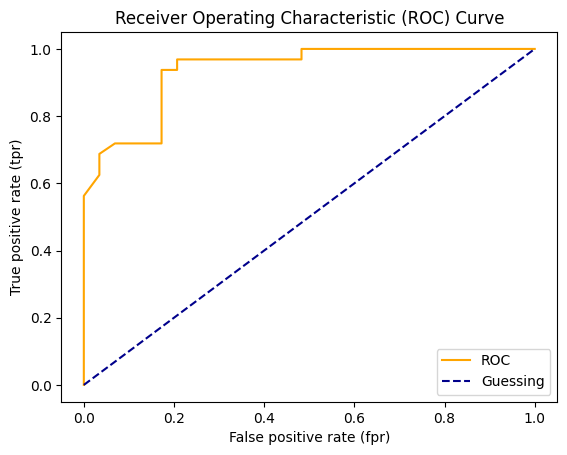

In [73]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model.
    """
    # Plot roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    # Plot line with no predictive power (baseline)
    plt.plot([0,1],[0,1], color="darkblue", linestyle="--", label="Guessing")
    # Customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

In [74]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.9358836206896552

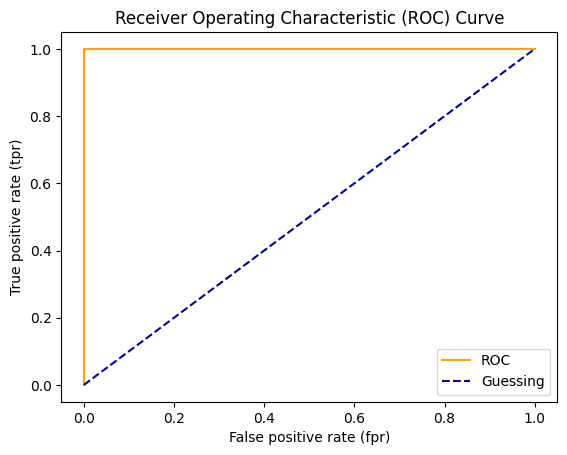

In [75]:
# Plot perfect ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [76]:
# Perfect AUC score
roc_auc_score(y_test, y_test)

1.0

**Confusion Matrix**

A confusion matrix is a quick way to compare the labels a model predict and the actual labels it was supposed to predict.

In essence, giving you an idea of where the model is getting confused.

In [98]:
from sklearn.metrics import confusion_matrix
y_preds = clf.predict(X_test)
confusion_matrix(y_test, y_preds)

array([[24,  5],
       [ 4, 28]], dtype=int64)

In [99]:
# Visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test,
            y_preds,
            rownames=["Actual Labels"],
            colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,24,5
1,4,28


In [100]:
conf_matrix = np.array([["True Negatives","False Negatives"],
         ["False Positives","True Positives"]])
pd.DataFrame(conf_matrix,)

,0,1
0,True Negatives,False Negatives
1,False Positives,True Positives


* True Positive = model predicts 1 when truth is 1
* False Positive = model predicts 1 when truth is 0
* True Negative = model predicts 0 when truth is 0
* False Negative = model predicts 0 when truth is 1


In [93]:
# Make our confusion matrix more visual with Seaborn's heatmap()
!pip install seaborn

   ---------------------------------------- 0.0/294.8 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.8 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.8 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.8 kB 435.7 kB/s eta 0:00:01
   --------------------------------- ------ 245.8/294.8 kB 2.1 MB/s eta 0:00:01
   -------------------------------------- - 286.7/294.8 kB 2.5 MB/s eta 0:00:01
   -------------------------------------- - 286.7/294.8 kB 2.5 MB/s eta 0:00:01
   -------------------------------------- - 286.7/294.8 kB 2.5 MB/s eta 0:00:01
   -------------------------------------- - 286.7/294.8 kB 2.5 MB/s eta 0:00:01
   -------------------------------------- - 286.7/294.8 kB 2.5 MB/s eta 0:00:01
   -------------------------------------- - 286.7/294.8 kB 2.5 MB/s eta 0:00:01
   -------------------------------------- - 286.7/294.8 kB 2.5 MB/s eta 0:00:01
   -------------------------------------- - 286.7/294.8 kB 2.5 MB/

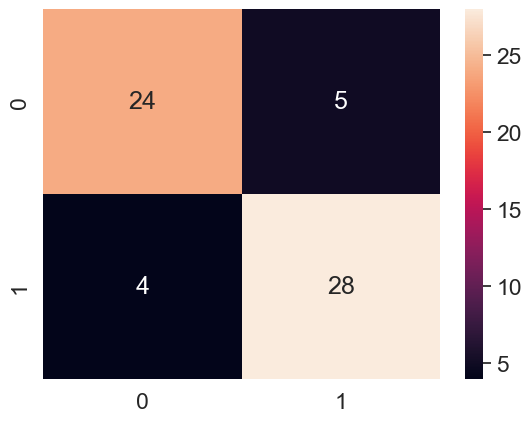

In [105]:
import seaborn as sns

# Set the font scale
sns.set(font_scale=1.5)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

# Plot it using Seaborn
sns.heatmap(conf_mat, annot=True);

## Creating a confusion matrix using Scikit-Learn


In [103]:
import sklearn
sklearn.__version__

'1.3.2'

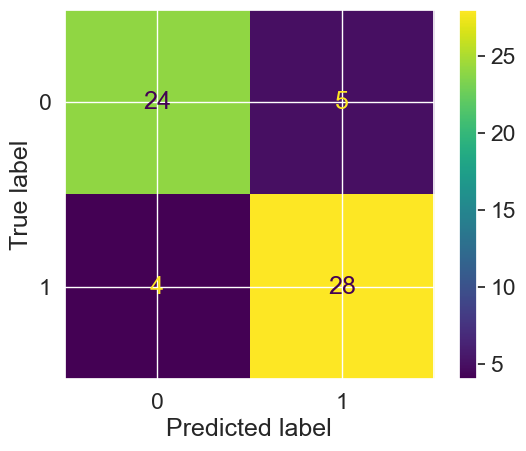

In [107]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X_test, y=y_test);

## Classification Report

In [109]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [113]:
# Where precision and recall become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 # only one positive case

disease_preds = np.zeros(10000) # model predicts every case as 0

pd.DataFrame(classification_report(disease_true,
                                   disease_preds,
                                   output_dict=True))

C:\Users\UNIEURO\Desktop\sample_project\env\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\UNIEURO\Desktop\sample_project\env\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\UNIEURO\Desktop\sample_project\env\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


*To summarize classification metrics:*
* *Accuracy* is a good measure to start with if all classes are balanced (e.g. same amount of samples which are labelled with 0 or 1).
* *Precision* and *Recall* become more important when classes are imbalanced.
* if false positive predictions are worse than false negatives, aim for higher precision.
* if false negative predictions are worse than false postives, aim for higher recall.
* *F1-score* is a combination of precision and recall.

### 4.2.2 Regression model evaluation metrics

1. R^2 (r-squared) or coefficient of determination
2. Mean absolute error (MAE)
3. Mean squared error (MSE)

In [115]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [116]:
model.score(X_test, y_test)

0.8065734772187598

In [117]:
y_test[:5]

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
Name: target, dtype: float64

In [118]:
y_test.mean()

2.0550030959302323

In [120]:
np.mean(model.predict(X_test))

2.0670514880571704

**R^2**

What R-squared does: compares your models predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. For example, if all your model does is predict the mean of the targets, it's R^2 value would be 0. And if yoyur model perfectly predicts a range of numbers, it's R^2 value would be 1.

In [122]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())
y_test_mean[:10], len(y_test_mean), len(y_test)

(array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
        2.0550031, 2.0550031, 2.0550031, 2.0550031]),
 4128,
 4128)

In [123]:
r2_score(y_true=y_test,
         y_pred=y_test_mean)

0.0

In [124]:
r2_score(y_true=y_test,
         y_pred=y_test)

1.0

In [127]:
y_preds = model.predict(X_test)
r2_score(y_true=y_test,
         y_pred=y_preds)

0.8065734772187598

**Mean absolute error (MAE)**

MAE is the average of the absolute differences between predictions and actual values.

It gives you an idea of how wrong your models predictions are.

In [126]:
# MAE
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

0.32659871732073664

In [129]:
df = pd.DataFrame(data={"actual values": y_test,
                        "predicted values": y_preds})
df["differences"] = df["predicted values"] - df["actual values"]
df.head()

(       actual values  predicted values  differences
 20046        0.47700          0.493840     0.016840
 3024         0.45800          0.754940     0.296940
 15663        5.00001          4.928596    -0.071414
 20484        2.18600          2.543160     0.357160
 9814         2.78000          2.331760    -0.448240,
 0.012048392126937589)

In [131]:
# MAE using formula and differences
df["differences"].abs().mean()

0.32659871732073664

**Mean squared error (MSE)**

MSE is the mean of the square of the errors between actual and predicted values.

In [132]:
# MSE
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
mse

0.2534678520824551

In [134]:
df = pd.DataFrame(data={"actual values": y_test,
                        "predicted values": y_preds})
df["differences"] = df["predicted values"] - df["actual values"]
df.head()

,actual values,predicted values,differences
20046,0.47700,0.493840,0.016840
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.543160,0.357160
9814,2.78000,2.331760,-0.448240


In [137]:
np.square(df["differences"]).mean()

0.2534678520824551

In [150]:
df["squared_differences"] = np.square(df["differences"])
df.iloc[1:100, df.columns.get_loc('squared_differences')] = 20
                                    

In [146]:
df.head()

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.493840,0.016840,0.000284
3024,0.45800,0.754940,0.296940,16.000000
15663,5.00001,4.928596,-0.071414,16.000000
20484,2.18600,2.543160,0.357160,16.000000
9814,2.78000,2.331760,-0.448240,16.000000


In [151]:
df["squared_differences"].mean()

0.7295421709146245

# Machine Learning Model Evaluation

Evaluating the results of a machine learning model is as important as building one.

But just like how different problems have different machine learning models, different machine learning models have different evaluation metrics.

Below are some of the most important evaluation metrics you'll want to look into for classification and regression models.

Classification Model Evaluation Metrics/Techniques

Accuracy - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.

Precision - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.

Recall - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.

F1 score - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.

Confusion matrix - Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagonal line).

Cross-validation - Splits your dataset into multiple parts and train and tests your model on each part then evaluates performance as an average.

Classification report - Sklearn has a built-in function called classification_report() which returns some of the main classification metrics such as precision, recall and f1-score.

ROC Curve - Also known as receiver operating characteristic is a plot of true positive rate versus false-positive rate.

Area Under Curve (AUC) Score - The area underneath the ROC curve. A perfect model achieves an AUC score of 1.0.

Which classification metric should you use?

Accuracy is a good measure to start with if all classes are balanced (e.g. same amount of samples which are labelled with 0 or 1).

Precision and recall become more important when classes are imbalanced.

If false-positive predictions are worse than false-negatives, aim for higher precision.

If false-negative predictions are worse than false-positives, aim for higher recall.

F1-score is a combination of precision and recall.

A confusion matrix is always a good way to visualize how a classification model is going.

Regression Model Evaluation Metrics/Techniques

R^2 (pronounced r-squared) or the coefficient of determination - Compares your model's predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. For example, if all your model does is predict the mean of the targets, its R^2 value would be 0. And if your model perfectly predicts a range of numbers it's R^2 value would be 1.

Mean absolute error (MAE) - The average of the absolute differences between predictions and actual values. It gives you an idea of how wrong your predictions were.

Mean squared error (MSE) - The average squared differences between predictions and actual values. Squaring the errors removes negative errors. It also amplifies outliers (samples which have larger errors).

Which regression metric should you use?

R2 is similar to accuracy. It gives you a quick indication of how well your model might be doing. Generally, the closer your R2 value is to 1.0, the better the model. But it doesn't really tell exactly how wrong your model is in terms of how far off each prediction is.

MAE gives a better indication of how far off each of your model's predictions are on average.

As for MAE or MSE, because of the way MSE is calculated, squaring the differences between predicted values and actual values, it amplifies larger differences. Let's say we're predicting the value of houses (which we are).

Pay more attention to MAE: When being $10,000 off is twice as bad as being $5,000 off.

Pay more attention to MSE: When beingcribing MSE (mean squared error) and RSME (root mean squared error) squared error) and RSME (root mean squared error)

### 4.2.3 Scoring parameter

In [157]:
from sklearn.model_selection import cross_val_score
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, cv=3, scoring=None)
cv_r2.mean()

0.6545458023124507

In [159]:
# Mean absolute error
cv_mae =cross_val_score(model, X, y, cv=3, scoring="neg_mean_absolute_error")
np.mean(cv_mae)

-0.4820330437306202

In [161]:
# Mean squared error
cv_mse = cross_val_score(model, X, y, cv=3, scoring="neg_mean_squared_error")
np.mean(cv_mse)

-0.4577252089624541

### 4.3 Using different evaluation metrics as Scikit-Learn functions

In [179]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier().fit(X_train, y_train)
                                                

In [180]:
y_preds = clf.predict(X_test)
print("Classification model metrics on the test set")
print(f"Accuracy_score:{accuracy_score(y_test,y_preds)*100:.2f}%")
print(f"Precision_score:{precision_score(y_test, y_preds)}")
print(f"Recall_score:{recall_score(y_test, y_preds)}")
print(f"F1_score:{f1_score(y_test, y_preds)}")


Classification model metrics on the test set
Accuracy_score:85.25%
Precision_score:0.8484848484848485
Recall_score:0.875
F1_score:0.8615384615384615


In [181]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)
X = housing_df[:500].drop("target", axis=1) # to save time, I am using only 500 samples from the dataset
y = housing_df[:500]["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor().fit(X_train, y_train)

In [183]:
y_preds = model.predict(X_test)
print("Regression model metrics on the test set")
print(f"R2_score:{r2_score(y_test, y_preds)}")
print(f"MAE:{mean_absolute_error(y_test, y_preds)}")
print(f"MSE:{mean_squared_error(y_test, y_preds)}")

Regression model metrics on the test set
R2_score:0.8611770174211815
MAE:0.278138114
MSE:0.1657913890909366


## 5. Improving a model

* First predictions = baseline predictions.
* First model = baseline model.

From a data perspective:
* Could we collect more data? (generally, the more data, the better)
* Could we improve our data?

From a model perspective:
* Is there a better model we could use?
* Could we improve the current model?

Hyperparameters vs Parameters:
* Parameters = model find these patterns in data
* Hyperparameters = settings on a model you can adjust to (potentially) improve its ability to find patterns.

Three ways to adjust hyperparameters:
1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV

In [184]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

In [185]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 Tuning Hyperparameters by Hand
Let's make 3 sets, training, validation and test

In [186]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

We'are going to try and adjust:
* max_depth
* max_features
* min_samples_leaf
* min_samples_split
* n_estimators
 'n_jobs': Non

In [188]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels
    on a classification.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy" : round(accuracy, 2),
                   "precision" : round(precision, 2),
                   "recall" : round(recall, 2),
                   "f1" : round(f1, 2)}
    print(f"Accuracy_score:{accuracy * 100:.2f}%")
    print(f"Precision__score:{precision:.2f}")
    print(f"Recall_score:{recall:.2f}")
    print(f"F1_score:{f1:.2f}")
    return metric_dict
    

In [259]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1) # shuffle 100% data

# Split into X and y
X = heart_disease_shuffled.drop("target",axis=1)
y = heart_disease_shuffled["target"]

# Split the data into train, validation & test sets
train_split = round(0.7 * len(heart_disease_shuffled)) # 70% of data --> in our case train_split = 212
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled)) # 15% of the data --> in our case valid_split = 257
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

In [260]:
len(X_train), len(X_valid), len(X_test) # 70% for train, 15% for validation and 15% for test

(212, 45, 46)

In [261]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make baseline predictions
y_preds = clf.predict(X_valid)

# Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Accuracy_score:82.22%
Precision__score:0.81
Recall_score:0.88
F1_score:0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [262]:
np.random.seed(42)

# Create a second classifier with different hyperparameters
clf_2 = RandomForestClassifier(n_estimators=100)
clf_2.fit(X_train, y_train)

# Make predictions
y_preds_2 = clf_2.predict(X_valid)

# Evaluate the 2nd classifier
clf_2_metrics = evaluate_preds(y_valid, y_preds_2)

Accuracy_score:82.22%
Precision__score:0.84
Recall_score:0.84
F1_score:0.84


In [263]:
clf_3 = RandomForestClassifier(n_estimators=100,
                               max_depth=10)
clf_3.fit(X_train, y_train)

# Make predictions
y_preds_3 = clf_2.predict(X_valid)

# Evaluate the 3rd classifier
clf_3_metrics = evaluate_preds(y_valid, y_preds_3)

Accuracy_score:82.22%
Precision__score:0.84
Recall_score:0.84
F1_score:0.84


### 5.2 Hyperparametrs tuning with RandomizedsearchCV

In [265]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split

grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth" : [None, 5, 10, 20, 30],
        "max_features": ['sqrt', 'log2', None],
        "min_samples_split":[2, 4, 6],
        "min_samples_leaf":[1, 2, 4]}

np.random.seed(42)

# Split into X & y
# X = heart_disease_shuffled.drop("target", axis=1)
# y = heart_disease_shuffled["target"]

# Split into train and test case
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomForesrClassifier
clf = RandomForestClassifier(n_jobs=1) # n_job indicate how many dedicated processors I wanto use. Default is none.

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid,
                            n_iter=10, # number of model to try
                            cv = 5,
                            verbose = 2)
#  Fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   1.5s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   1.5s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; 

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [220]:
rs_clf.best_params_

{'n_estimators': 1200,
 'min_samples_split': 6,
 'min_samples_leaf': 4,
 'max_features': 'log2',
 'max_depth': 30}

In [232]:
rs_clf.best_estimator_

RandomForestClassifier(max_depth=30, max_features='log2', min_samples_leaf=4,
                       min_samples_split=6, n_estimators=1200, n_jobs=1)

In [266]:
# Make predictions with the best hyperparameters
rs_y_preds = rs_clf.predict(X_test)

# Evaluate the predictions
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Accuracy_score:82.61%
Precision__score:0.84
Recall_score:0.84
F1_score:0.84


## 5.3 Hyperparameter tuning with GridSearchCV

In [225]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['sqrt', 'log2', None],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [233]:
grid_2 ={"n_estimators": [500, 1000, 1200],
        "max_depth" : [20, 30],
        "max_features": ['log2'],
        "min_samples_split":[6],
        "min_samples_leaf":[4]}


In [267]:
from sklearn.model_selection import GridSearchCV
# Setup GridSearchCV
gs_clf = GridSearchCV(estimator=clf,
                      param_grid=grid_2,
                      cv=5,
                      verbose=2)
# Fit the GridSearchCV version of clf
gs_clf.fit(X_train, y_train)


Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   0.8s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   0.7s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   0.7s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   0.8s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   0.7s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   1.6s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   1.5s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=10

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [20, 30], 'max_features': ['log2'],
                         'min_samples_leaf': [4], 'min_samples_split': [6],
                         'n_estimators': [500, 1000, 1200]},
             verbose=2)

In [268]:
gs_y_preds = gs_clf.predict(X_test)

gs_metrics = evaluate_preds(y_test, gs_y_preds)

Accuracy_score:84.78%
Precision__score:0.88
Recall_score:0.84
F1_score:0.86


In [240]:
gs_clf.best_estimator_

RandomForestClassifier(max_depth=30, max_features='log2', min_samples_leaf=4,
                       min_samples_split=6, n_estimators=500, n_jobs=1)

### Let's compare our different models metrics

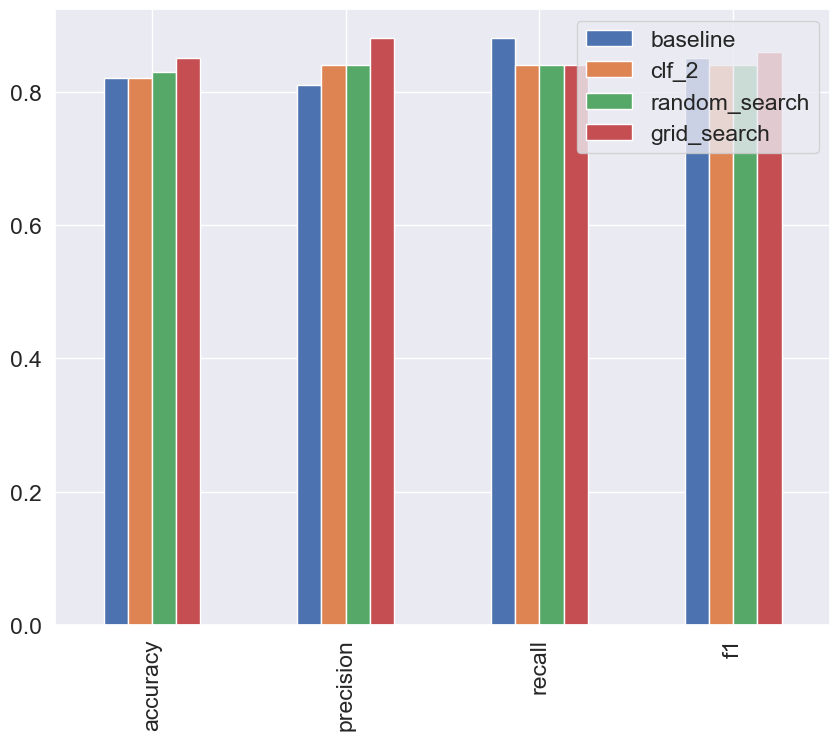

In [269]:
compare_metrics = pd.DataFrame({"baseline":baseline_metrics,
                                "clf_2": clf_2_metrics,
                                "random_search":rs_metrics,
                                "grid_search":gs_metrics})
compare_metrics.plot.bar(figsize=(10,8));

## 6. saving and loading trained machine learning models

Two ways to save and load machine learning models:
1. with Python's pickle module
2. with the joblib module

**Pickle**

In [248]:
import pickle

# Save an existing model to file
pickle.dump(gs_clf, open("gs_RandomForestModel_1.plk", "wb"))

In [250]:
# Load a saved model
loaded_pickle_model = pickle.load(open("gs_RandomForestModel_1.plk", "rb"))

In [252]:
evaluate_preds(y_test, loaded_pickle_model.predict(X_test))

Accuracy_score:83.61%
Precision__score:0.78
Recall_score:0.89
F1_score:0.83


{'accuracy': 0.84, 'precision': 0.78, 'recall': 0.89, 'f1': 0.83}

**Joblib**

In [253]:
from joblib import dump, load

# Save model to file
dump(gs_clf, filename="gs_RandomForestModel_2.joblib")

['gs_RandomForestModel_2.joblib']

In [254]:
# Load a saved model
loaded_joblib_model = load("gs_RandomForestModel_2.joblib")

In [255]:
evaluate_preds(y_test, loaded_joblib_model.predict(X_test))

Accuracy_score:83.61%
Precision__score:0.78
Recall_score:0.89
F1_score:0.83


{'accuracy': 0.84, 'precision': 0.78, 'recall': 0.89, 'f1': 0.83}

## 7. Putting it all together!

In [256]:
data = pd.read_csv("data/car-sales-extended-missing-data.csv")
data.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [257]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [258]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

### Thing to remember:

* All data should be numerical
* There should be no missing values
* Manipulate the test set the same as the training set
* Never test on data you've trained
* Tune hyperparameters on validation set OR use cross-validation
* One best performance metric does not mean the best model.


Steps we want to do (all in one cell):
1. Fill missing data
2. Convert data to numbers
3. Build a model on the data

In [270]:
# Getting data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

# Setup random seed
import numpy as np
np.random.seed(42)

# Import data and drop rows with missing labels
data = pd.read_csv("data/car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"], inplace=True)

# Define different features and transformer pipeline
categorical_feature = ["Make", "Colour"]
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
     ("onehot", OneHotEncoder(handle_unknown="ignore"))])
door_feature = ["Doors"]
door_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value=4))])
numeric_feature = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean"))])

# Setup the preprocessing steps
# (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(transformers=[
    ("cat", categorical_transformer, categorical_feature),
    ("door", door_transformer, door_feature),
    ("num", numeric_transformer, numeric_feature)])

# Creating a preprocessing and modelling pipeline
model = Pipeline(steps=[("preprocessor", preprocessor),
                        ("model", RandomForestRegressor())])

# Split data
X = data.drop("Price", axis=1)
y = data["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit and score the model
model.fit(X_train, y_train)
model.score(X_test, y_test)

               

0.22188417408787875

It's also possible to use **GridSearchCV** or **RandomizedSearchCV** with our **Pipeline**.

In [ ]:
# Use GridSearchCV with our regression Pipeline
pipe_grid = {
    "preprocessor__num__imputer__strategy": ["mean", "median"],
    "model__n_estimators":[100,1000],
    "model__max_depth":[None,5],
    "model__max_features":['sqrt', 'log2', None],
    "model__min_samples_split": [2,4]}

gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)
gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samp

In [ ]:
gs_model.score(X_test, y_test)